後処理古典（ex0）と提案手法を比較(ex1)

## ライブラリとパス

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

ex0 = "/home/toshiya1048/experiments/ex0/knapsack/results.csv"
ex1 = "/home/toshiya1048/dev/QA_knap/out/ex1_execution_time_summary_ex1.csv"


## ex0の求解時間のplot

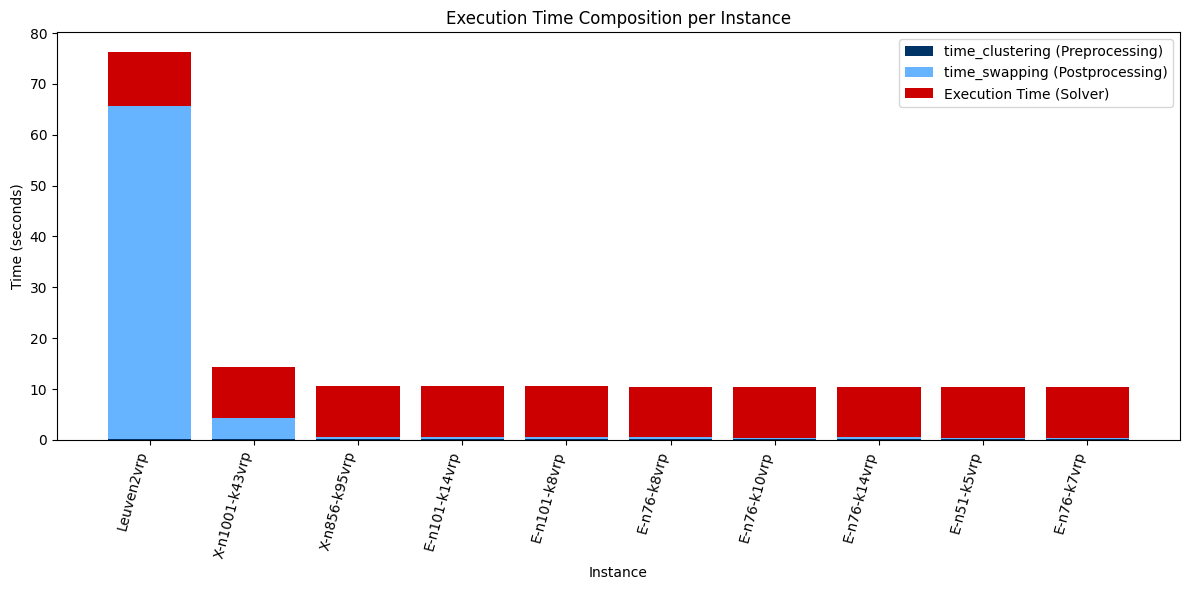

In [3]:

# CSV読み込み
df = pd.read_csv(ex0)

# データ抽出
instances = df["Instance"]
time_clustering = df["time_clustering"]
time_swapping = df["time_swapping"]
execution_time = df["Execution Time"]

# 合計時間（ソート用）
total_time = time_clustering + time_swapping + execution_time
sorted_idx = np.argsort(-total_time)

instances = instances.iloc[sorted_idx]
time_clustering = time_clustering.iloc[sorted_idx]
time_swapping = time_swapping.iloc[sorted_idx]
execution_time = execution_time.iloc[sorted_idx]

# 積み上げ棒グラフ
plt.figure(figsize=(12, 6))
plt.bar(instances, time_clustering, label="time_clustering (Preprocessing)", color="#003366")  # 濃い青
plt.bar(instances, time_swapping, bottom=time_clustering, label="time_swapping (Postprocessing)", color="#66b3ff")  # 薄い青
plt.bar(instances, execution_time, bottom=time_clustering + time_swapping,
        label="Execution Time (Solver)", color="#cc0000")  # 赤

plt.xlabel("Instance")
plt.ylabel("Time (seconds)")
plt.title("Execution Time Composition per Instance")
plt.xticks(rotation=75, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("execution_time_composition_stacked.png", dpi=160)
plt.show()


# ex1の求解時間の比較

In [17]:
# %%
# === ライブラリ読み込み ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# %%
# === データ読み込み ===
# out/ にある CSV をロード
csv_path = Path(ex1)
df = pd.read_csv(csv_path)

# DataFrameの中身を確認
display(df)

# %%
# === プロット ===
plt.figure(figsize=(10, 5))
plt.bar(df["instance"], df["total_execution_time"], color="#66b3ff", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Instance")
plt.ylabel("Total Execution Time (s)")
plt.title("Total Execution Time per Instance (ex1)")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# %%
# === 並べ替えたバージョン（降順で見やすく）===
df_sorted = df.sort_values("total_execution_time", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_sorted["instance"], df_sorted["total_execution_time"], color="#66b3ff")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Instance")
plt.ylabel("Total Execution Time (s)")
plt.title("Sorted Total Execution Time per Instance (ex1)")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/home/toshiya1048/dev/QA_knap/out/ex1_execution_time_summary_ex1.csv'

,instance,iteration_1_time
0,E-n101-k14_before_data,149.150877
1,E-n101-k8_before_data,79.661307
2,E-n51-k5_before_data,59.902002
3,E-n76-k10_before_data,109.201549
4,E-n76-k14_before_data,159.297743
5,E-n76-k7_before_data,69.616960
6,E-n76-k8_before_data,79.470170
7,Leuven2_before_data,457.718232
8,X-n1001-k43_before_data,438.766578
9,X-n856-k95_before_data,945.048900


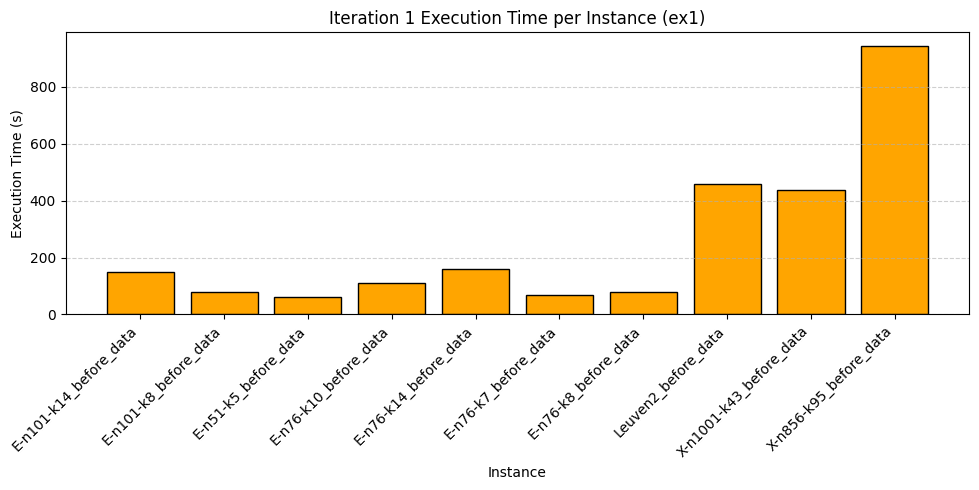

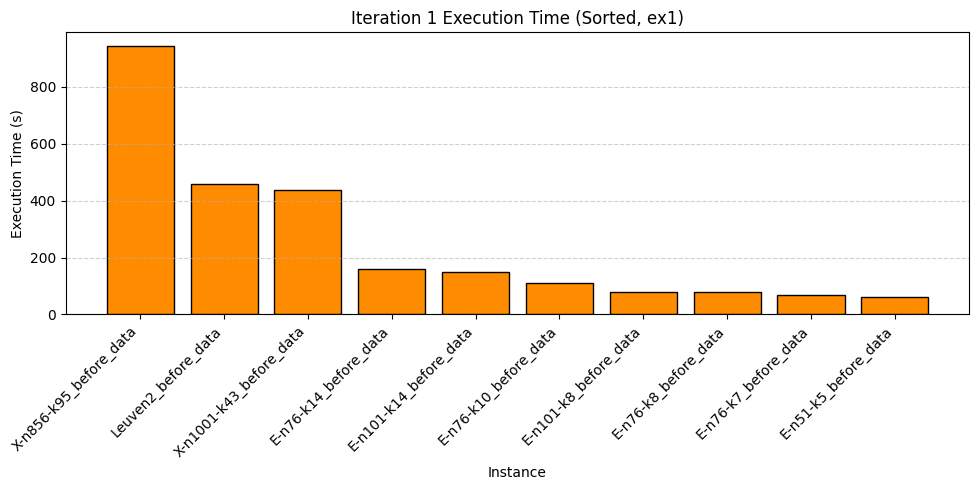

平均: 254.7834
最大: 945.0489
最小: 59.902


In [20]:
# %%
# === ライブラリ読み込み ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# %%
# === データ読み込み ===
csv_path = Path("/home/toshiya1048/dev/QA_knap/out/iteration1_time_ex1.csv")  # スクリプトで出力したCSV
df = pd.read_csv(csv_path)
display(df)

# %%
# === 棒グラフ ===
plt.figure(figsize=(10, 5))
plt.bar(df["instance"], df["iteration_1_time"], color="orange", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Instance")
plt.ylabel("Execution Time (s)")
plt.title("Iteration 1 Execution Time per Instance (ex1)")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# %%
# === 並べ替え（大きい順）で可視化 ===
df_sorted = df.sort_values("iteration_1_time", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(df_sorted["instance"], df_sorted["iteration_1_time"], color="darkorange", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Instance")
plt.ylabel("Execution Time (s)")
plt.title("Iteration 1 Execution Time (Sorted, ex1)")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# %%
# === 簡単な統計 ===
print("平均:", round(df['iteration_1_time'].mean(), 4))
print("最大:", round(df['iteration_1_time'].max(), 4))
print("最小:", round(df['iteration_1_time'].min(), 4))
